In [16]:
import pandas as pd
import numpy as np

from sklearn import datasets

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import roc_auc_score
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline


In [3]:
# Decision Tree
def get_decision_tree(features, labels, criterion="entropy", max_depth=6) :
    decision_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    #decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=5)
    decision_tree = decision_tree.fit(features, labels)

    print("Decision Tree (" + criterion + ", " + str(max_depth) + ")")
    print("==============================")
    print("Feature Importance : " + str(decision_tree.feature_importances_))    
    print("Score : " + str(decision_tree.score(features, labels)))
    print()
    
    return decision_tree


In [4]:
# Random Forest
def get_random_forest(features, labels, criterion="entropy", max_depth=6, min_samples_split=2, n_estimators=100, random_state=1) :
    random_forest = RandomForestClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, n_estimators=n_estimators, random_state=random_state)
    #random_forest = RandomForestClassifier(criterion="gini", max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
    random_forest = random_forest.fit(features, labels)

    print("Random Forest (" + criterion + ", " + str(max_depth) + ", " + str(min_samples_split) + ")")
    print("=====================================")
    print("Feature Importance : " + str(random_forest.feature_importances_))    
    print("Score : " + str(random_forest.score(features, labels)))
    print()
    
    return random_forest


In [5]:
# Confusion Matrix
def plot_confusion_matrix(df_confusion, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(df_confusion, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.yticks(np.arange(len(classes)), classes)
    plt.xticks(np.arange(len(classes)), classes)
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    thresh = df_confusion.max() / 2
    for i, j in itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1])):
        plt.text(j, i, df_confusion[i, j],
                 horizontalalignment="center",
                 color="white" if df_confusion[i, j] > thresh else "black")


In [6]:
# ROC AUC
def plot_multi_roc_curve(y, pred, classes, title='Receiver Operating Characteristic'):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], threshold = metrics.roc_curve(y[:, i],pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    colors = ['aqua','darkorange','yellow','green','blue','black']
    for i,color,class_name in zip(range(len(classes)),colors,classes):
        plt.plot(fpr[i], tpr[i], color=color, label='{0} (area = {1:0.2f})'''.format(class_name, roc_auc[i]))
    plt.title(title)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--',label = 'root')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

In [7]:
# 3D Plot
def plot_3d_graph(feature_x, feature_y, feature_z, feature_name_x, feature_name_y, feature_name_z, labels):
    fig = plt.figure(1, figsize=(7, 5))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    ax.scatter(feature_x, feature_y, feature_z, c=labels)

    #ax.w_xaxis.set_ticklabels([])
    #ax.w_yaxis.set_ticklabels([])
    #ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel(feature_name_x)
    ax.set_ylabel(feature_name_y)
    ax.set_zlabel(feature_name_z)
    plt.show()
    

In [23]:
iris = datasets.load_iris()
#iris.data
X = iris.data[:, :3]  # we only take the first two features.
binarizer = LabelBinarizer()
Y = binarizer.fit_transform(iris.target)
#print(Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.33,random_state=0)
#print(X_test)

decision_tree = get_decision_tree(X_train, Y_train, criterion="entropy", max_depth=6)
Y_predicted_decision_tree = decision_tree.predict(X_test)

Y_test_ori = binarizer.inverse_transform(Y_test)
Y_predicted_decision_tree_ori = binarizer.inverse_transform(Y_predicted_decision_tree)

cm_decision_tree = metrics.confusion_matrix(Y_test_ori, Y_predicted_decision_tree_ori, labels=[0,1,2])


random_forest = get_random_forest(X_train, Y_train, criterion="entropy", max_depth=6, min_samples_split=2)
Y_predicted_random_forest = random_forest.predict(X_test)
cm_random_forest = metrics.confusion_matrix(Y_test.flatten(), Y_predicted_random_forest.flatten(), labels=[0,1,2])


Decision Tree (entropy, 6)
Feature Importance : [ 0.04541487  0.02480552  0.92977961]
Score : 0.99

Random Forest (entropy, 6, 2)
Feature Importance : [ 0.31635896  0.16244092  0.52120012]
Score : 0.99



[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


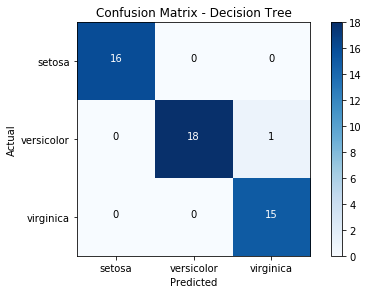

In [20]:
print(cm_decision_tree)
plot_confusion_matrix(cm_decision_tree, classes=iris.target_names, title='Confusion Matrix - Decision Tree')

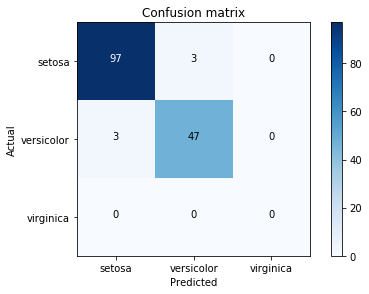

In [78]:
plot_confusion_matrix(cm_random_forest, classes=iris.target_names, title='Confusion Matrix - Random Forest')

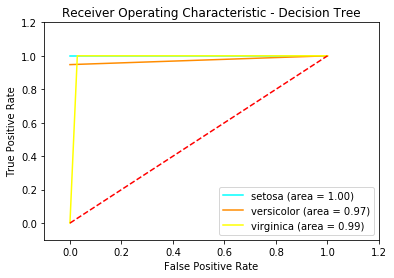

In [85]:
plot_multi_roc_curve(Y_test, Y_predicted_decision_tree, classes=iris.target_names, title='Receiver Operating Characteristic - Decision Tree') 

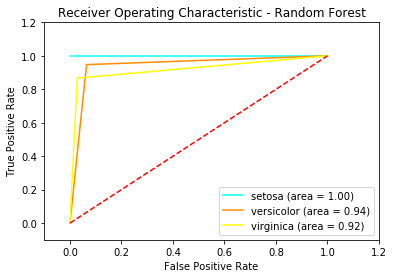

In [87]:
plot_multi_roc_curve(Y_test, Y_predicted_random_forest, classes=iris.target_names, title='Receiver Operating Characteristic - Random Forest') 

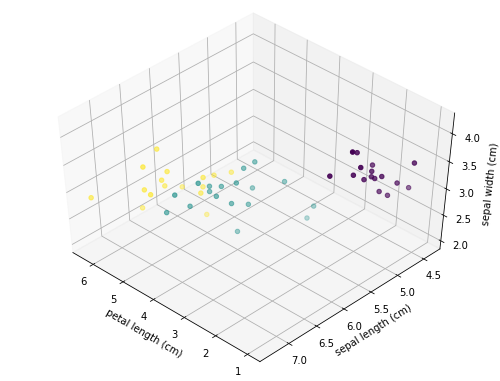

In [28]:
plot_3d_graph(X_test[:,2], X_test[:,0], X_test[:,1], iris.feature_names[2], iris.feature_names[0], iris.feature_names[1], Y_predicted_decision_tree_ori)

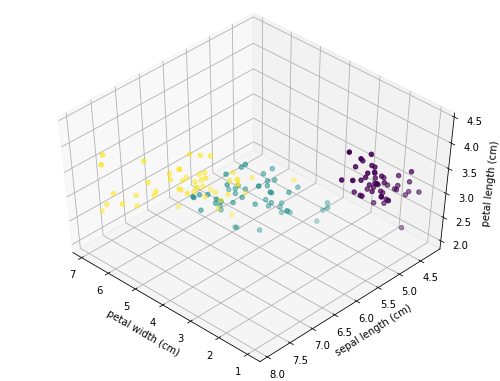

In [29]:
plot_3d_graph(X[:,2], X[:,0], X[:,1], iris.feature_names[3], iris.feature_names[0], iris.feature_names[2], iris.target)